# RandomForest with scikit-learn

We want to explore how to use scikit-learn for RandomForest. This includes preparing the data, training the model, and evaluating and visualizing the results.

We will use the following modules for this:
* [sklearn.datasets](https://scikit-learn.org/stable/api/sklearn.datasets.html): Tools for using common datasets for ML or for generating synthetic data
* [sklearn.model_selection](https://scikit-learn.org/stable/api/sklearn.model_selection.html): Tools for data splitting, cross-validation, and parameter tuning
* [sklearn.tree](https://scikit-learn.org/stable/api/sklearn.tree.html) and [sklearn.ensemble](https://scikit-learn.org/stable/api/sklearn.ensemble.html): Collection of tree- and ensemble-based models for regression and classification
* [sklearn.metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html): Collection of various metrics for model evaluation

**In general, also refer to the comprehensive [User Guide](https://scikit-learn.org/stable/user_guide.html) from scikit-learn.**

In [1]:
# Just in case we need help
# Import bia-bob as a helpful Python & Medical AI expert
from bia_bob import bob
import os

bob.initialize(
    endpoint='https://kiara.sc.uni-leipzig.de/api/v1', 
    model="vllm-llama-4-scout-17b-16e-instruct",
    system_prompt=os.getenv('SYSTEM_PROMPT_MEDICAL_AI')
)

In [2]:
%bob Who are you ? Just 1 sentence!

I'm a medical data science AI assistant, an expert in Python programming and data analysis, specializing in tasks like data analysis, feature engineering, machine learning, and deep learning for medical datasets.

## RandomForest for Regression

### Data preparation

Now we want to use a RondomForest to solve the regression problem for the [scikit-learn diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

Let's load the data again:

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [4]:
# Let's get our X,y first
X = diabetes.data
y = diabetes.target
# And here we also have proper labels for our features
feature_labels = diabetes.feature_names

In [5]:
print("Type X:", type(X))
print("Shape X:", X.shape)
print("First X:", X[0])
print("Labels X:", feature_labels)

Type X: <class 'numpy.ndarray'>
Shape X: (442, 10)
First X: [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
Labels X: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [6]:
print("Type y:", type(y))
print("Shape y:", y.shape)
print("First y:", y[0])

Type y: <class 'numpy.ndarray'>
Shape y: (442,)
First y: 151.0


### Train-test split

Now we split the data for training and model testing / evaluation in order to verify the generalization of the trained model on unknown data. For this purpose, we can use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [7]:
from sklearn.model_selection import train_test_split

# Split: 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("training data:", X_train.shape, "training labels:", y_train.shape)
print("test data:", X_test.shape, "test labels:", y_test.shape)

training data: (353, 10) training labels: (353,)
test data: (89, 10) test labels: (89,)


### Select and train a model

* We import the model [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and initialize the corresponding Python object using `()` **while also setting specific model parameters**
* Model training is started using the method [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.fit) 
* We pass the training data to this method, divided into features `X_train` and target `y_train`
* The model parameters are now adjusted to predict the target as accurately as possible based on the associated feature

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model with model parameters
# - n_estimators: number of decision trees in the forest
# - max_depth: maximum depth of a tree
model = RandomForestRegressor(
    n_estimators=5,
    max_depth=None
)

In [9]:
# Supervised training - “Fitting” the model to the training data with known labels
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",5
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

### Prediction and evaluation

We now want to check how well the model can predict the target for previously unknown features.

* The prediction is performed using the method [`.predict()`](https://scikit-learn.org/1.8/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.predict) – almost all models and algorithms in scikit-learn have this method.
* We pass the features of the test data to this method and receive the corresponding predictions of the target.

In [10]:
# Prediction on unseen test data
y_pred = model.predict(X_test)

We can now compare the predictions with the known target values of the test data and derive metrics for evaluating the model quality.

* A metric provided by RandomForestRegressor itself is the so-called `r2` score (coefficient of determination of a regression), which evaluates the overall goodness of fit
* Other suitable regression metrics are described, for example, in the [User Guide - Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
* We also choose the [Mean Absolute Error (MAE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)
* In general, it makes sense to calculate several metrics in order to get a better impression of the model quality

In [11]:
from sklearn.metrics import mean_absolute_error

# Metrics for determining model quality

# r^2 score, between 0.0 and 1.0, higher is better
r2_score = model.score(X_test, y_test)
print(f"r^2 score on test data: {r2_score:.3f}")

# Calculate mean absolute error (MAE), the best is 0.0
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on test data: {mse:.3f}")

r^2 score on test data: 0.390
Mean Absolute Error (MAE) on test data: 45.692


### Parameter tuning

At the moment, we have simply estimated the values for the model parameters `n_estimators` and `max_depth` and obtained an evaluation result for this combination. But how can we be sure that this is actually the best choice, or whether we can still improve the model quality?

In [12]:
# We can check all available parameters again
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Since trial and error would be very time-consuming with a large number of available parameters and combinations, we should use an automated approach that employs [scikit-learn hyper-parameter tuning methods](https://scikit-learn.org/stable/modules/grid_search.html).

We want to apply a basic grid search over specified parameter values using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid we want to search
param_grid = {
    'n_estimators': [1, 25, 50, 200],
    'max_depth': [None, 5, 25, 50],
}

# Initialize GridSearchCV with the following parameters
# - estimator: the model we want to tune
# - param_grid: the parameter grid to search from
# - scoring: score used to determine the model quality for given parameters
# - cv: cross-validation data splitting strategy (n-fold)
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5
)

In [14]:
# Perform grid search, may take a while
grid_search.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 5, ...], 'n_estimators': [1, 25, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'r2'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >

In [15]:
# Print best parameter combination with the best score
print("Best parameters for training data:", grid_search.best_params_)
print("Best score for training data:", grid_search.best_score_)

# Get the best model with the best parameter choice
best_model = grid_search.best_estimator_

Best parameters for training data: {'max_depth': 5, 'n_estimators': 200}
Best score for training data: 0.40719110568079026


As we can see, setting `max_depth=5` and `n_estimators=200` delivered the best results for the training data.

Let's evaluate the predictions of this best model with our test data.

In [16]:
# Prediction on unseen test data
y_pred_best = best_model.predict(X_test)

# r^2 score, between 0.0 and 1.0, higher is better
r2_score = best_model.score(X_test, y_test)
print(f"r^2 score on test data: {r2_score:.3f}")

# Calculate mean absolute error (MAE), the best is 0.0
mse = mean_absolute_error(y_test, y_pred_best)
print(f"Mean Absolute Error (MAE) on test data: {mse:.3f}")

r^2 score on test data: 0.460
Mean Absolute Error (MAE) on test data: 43.274


### Explainability

#### Feature importance

Now that we have an example with more than one feature, we can also evaluate the significance / importance of the features for the regression task. This helps to understand which features contributed to the prediction and to what extent. This information can then be used for a more refind feature selection. 

For this, some models in scikit-learn provide the attribute `feature_importances_` (impurity-based, good for low cardinality features). In addition, the more sophisticated method [`sklearn.inspection.permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) is available.

In [17]:
import numpy as np
import pandas as pd

# Extract feature importances from the model, store sorted in a pandas Series
importances = pd.Series(model.feature_importances_, index=feature_labels).sort_values(ascending=False)

# Get the standard deviations of importances across trees as a measure of the variability
importances_std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

Now we can plot the feature importances, including the standard deviations as error bars

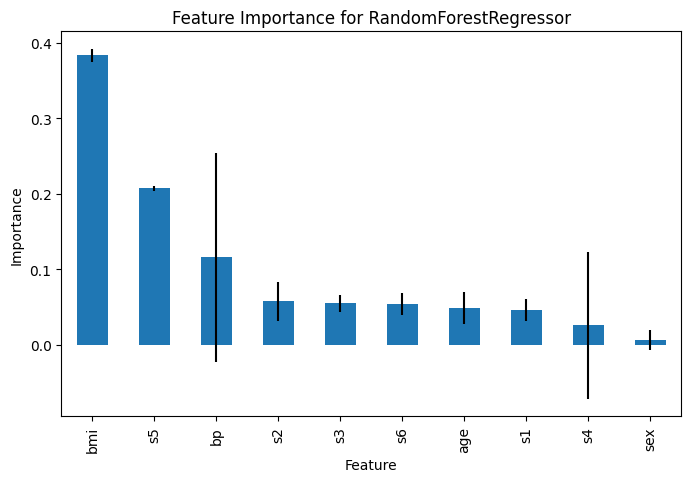

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
importances.plot(kind='bar', yerr=importances_std)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()

## Exercise: Classification with RandomForest

Now it's your turn to apply a RandomForest to a classification problem, using the [scikit-learn breast cancer diagnostic dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).

This data contains features computed from 569 digitized images of a breast mass, which shall be used to predict two classes: WDBC-Malignant, or WDBC-Benign. 

For example, you can use the following objects and methods:
* [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) as model
* [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) for parameter optimization
* [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html) for explainability

**If you get stuck, remember that our assistant bia-bob is available and very happy to help you.**

### Data preparation

In [19]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [20]:
# ToDo: understand the data better

### Train-test split

In [21]:
# ToDo: create data for training and test

### Select and train a model

In [22]:
# ToDo: initialize and train a classification model with parameter optimization

### Prediction and evaluation

In [23]:
# ToDo: evaluate the model quality